In [16]:
import pyrealsense2 as rs
import numpy as np
import matplotlib.pyplot as plt
import os

In [17]:
# Enumerate connected RealSense cameras
ctx = rs.context()
devices = ctx.query_devices()
device_serials = [device.get_info(rs.camera_info.serial_number) for device in devices]
device_serials.sort()

# Print selected device serial numbers
print("Selected device serial numbers:", device_serials)

# Create a pipeline for each camera
pipelines = []
align = rs.align(rs.stream.color)
base_dir = './images'

# Initialize RealSense pipeline for each camera
for idx, serial in enumerate(device_serials):
    os.makedirs(f'{base_dir}/test/camera{idx+1}_rgb', exist_ok=True)
    os.makedirs(f'{base_dir}/test/camera{idx+1}_depth', exist_ok=True)
    pipeline = rs.pipeline()
    config = rs.config()
    config.enable_device(serial)
    config.enable_stream(rs.stream.color, 1920, 1080, rs.format.rgb8, 30)
    config.enable_stream(rs.stream.depth, 1280, 720, rs.format.z16, 30)
    pipeline.start(config)
    pipelines.append(pipeline)

Selected device serial numbers: ['145422070656', '233522072900']


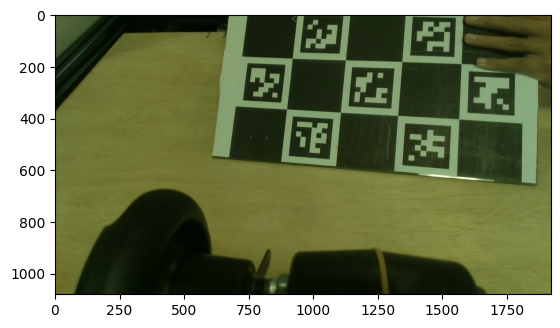

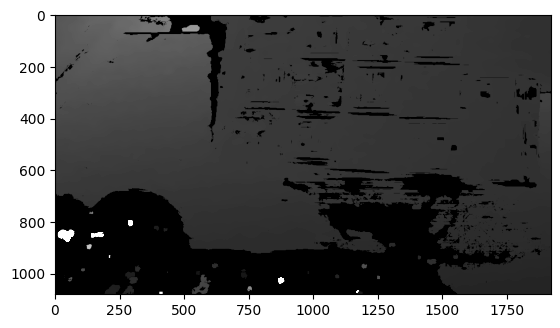

Saved ./images/test/camera1_rgb/1.png
Saved ./images/test/camera1_depth/1.npy


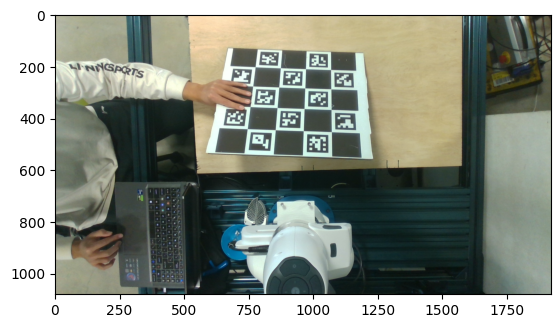

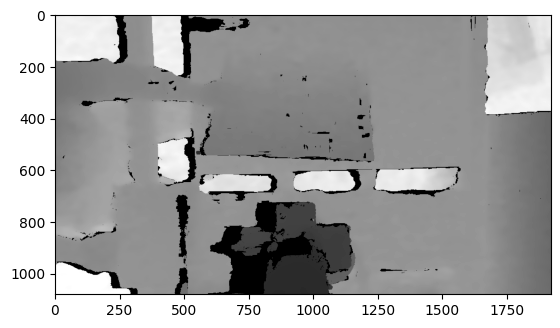

Saved ./images/test/camera2_rgb/1.png
Saved ./images/test/camera2_depth/1.npy


In [18]:
frame_num = 1
for idx, pipeline in enumerate(pipelines):
    # Wait for the next set of frames from the camera
    frames = pipeline.wait_for_frames()
    aligned_frames = align.process(frames)
    color_frame = aligned_frames.get_color_frame()
    depth_frame = aligned_frames.get_depth_frame()

    if not color_frame or not depth_frame:
        continue

    # Convert frames to numpy arrays
    color_image = np.asanyarray(color_frame.get_data())
    depth_image = np.asanyarray(depth_frame.get_data())

    # show the images
    plt.imshow(color_image)
    plt.show()
    plt.imshow(depth_image, cmap='gray', vmin=100, vmax=2000)
    plt.show()

    # Save the images
    rgb_filename = f'{base_dir}/test/camera{idx+1}_rgb/{frame_num}.png'
    depth_filename = f'{base_dir}/test/camera{idx+1}_depth/{frame_num}.npy'

    plt.imsave(rgb_filename, color_image)
    np.save(depth_filename, depth_image)
    
    print(f"Saved {rgb_filename}")
    print(f"Saved {depth_filename}")